# Medical Charges EDA
Quick exploratory data analysis for the `insurance.csv` dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Missing values

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Target distribution

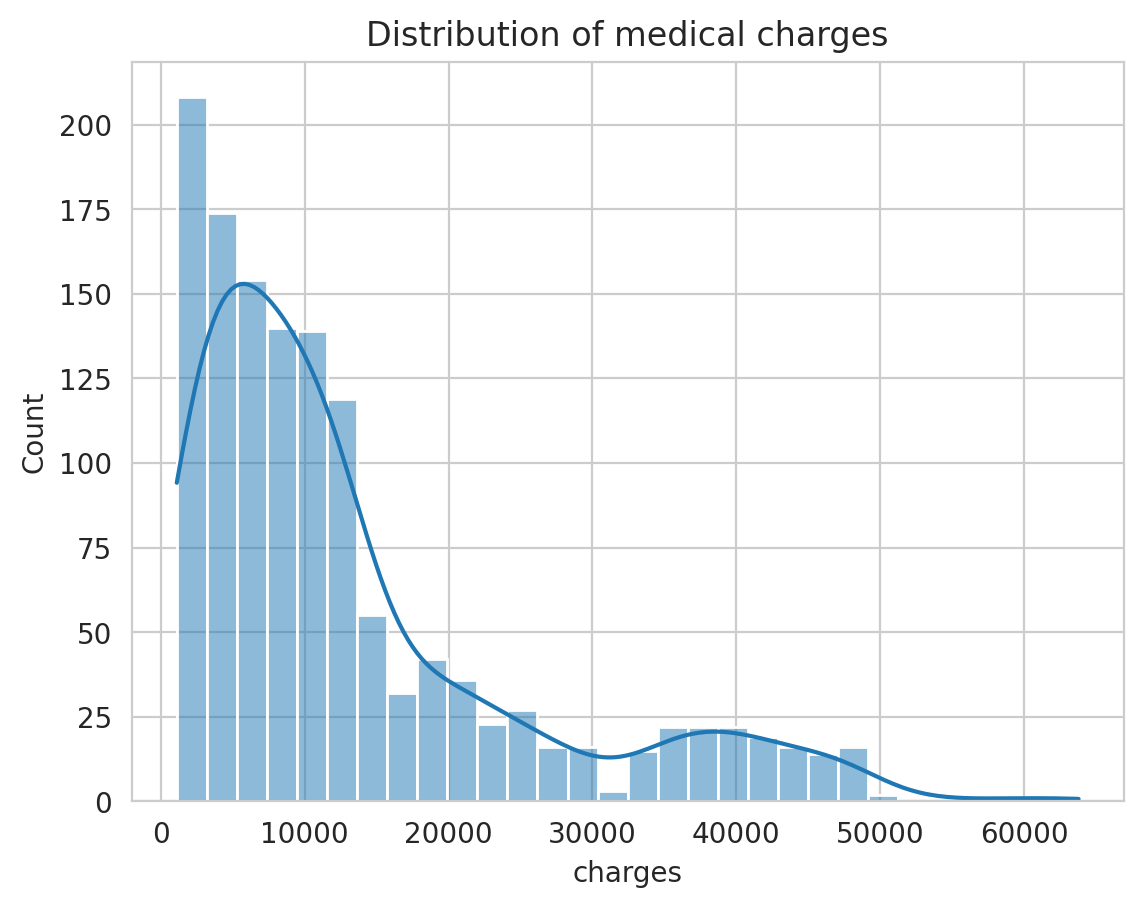

In [7]:
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of medical charges")
plt.show()

## Categorical features vs charges

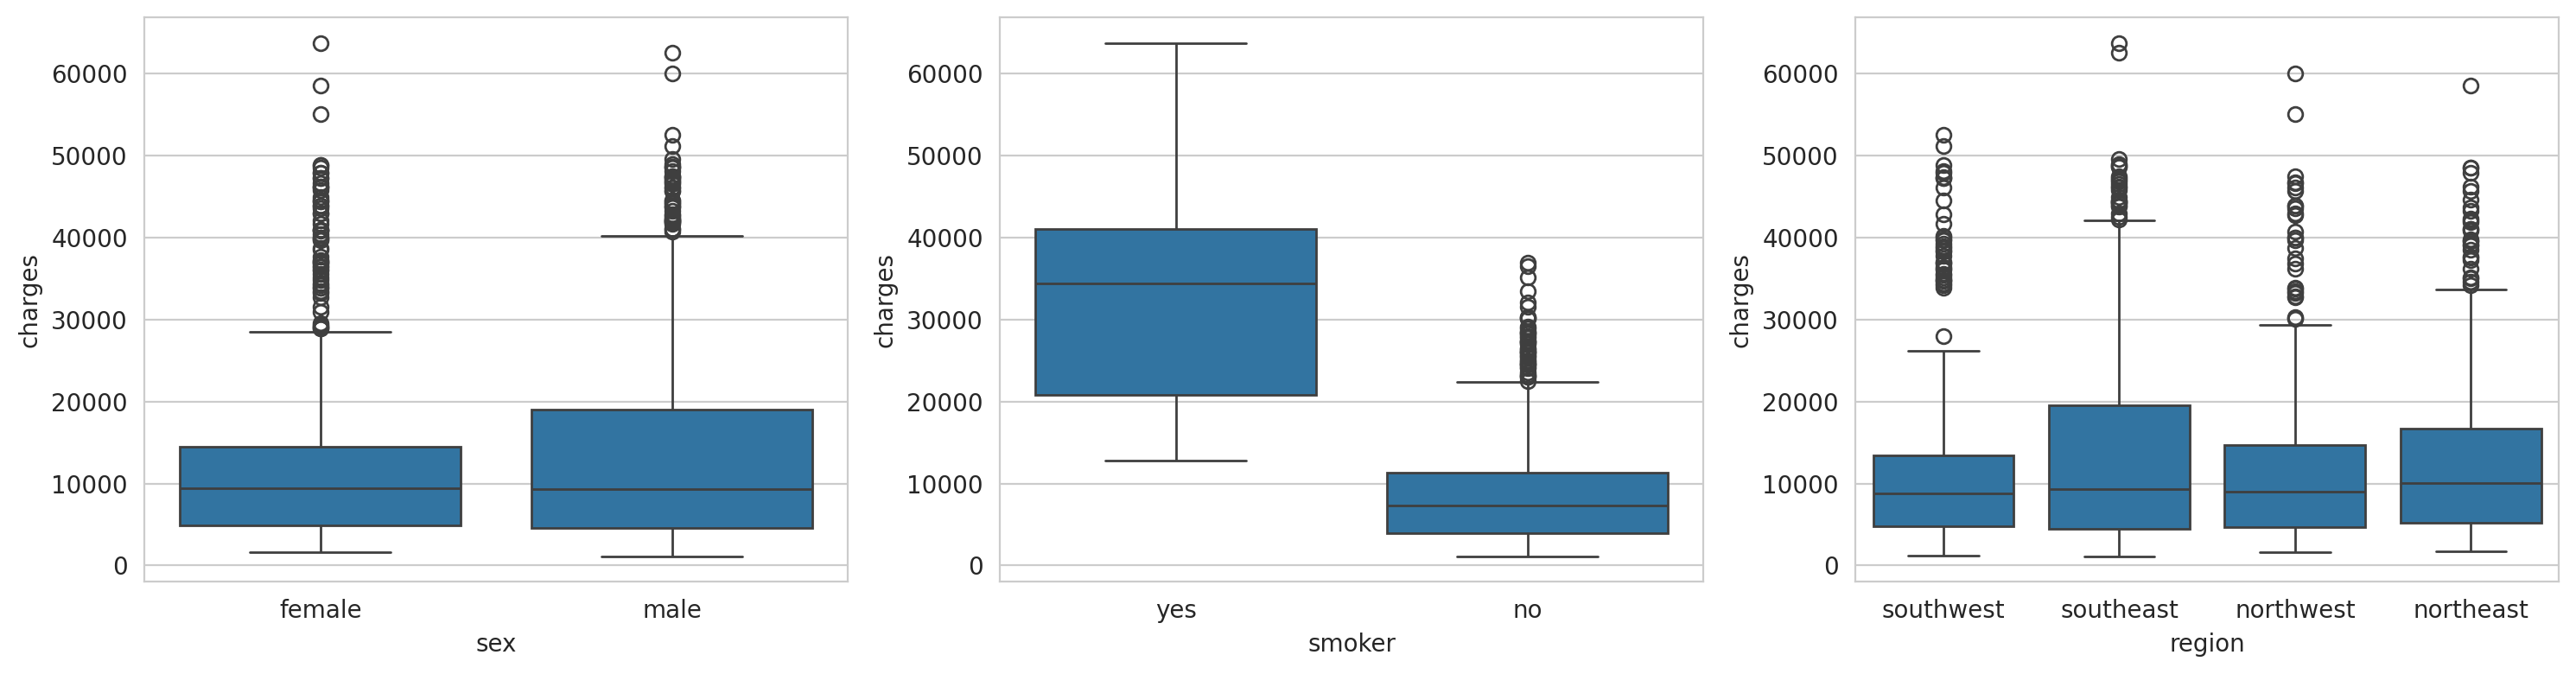

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(data=df, x="sex", y="charges", ax=ax[0])
sns.boxplot(data=df, x="smoker", y="charges", ax=ax[1])
sns.boxplot(data=df, x="region", y="charges", ax=ax[2])
plt.tight_layout()
plt.show()

## Numeric correlations

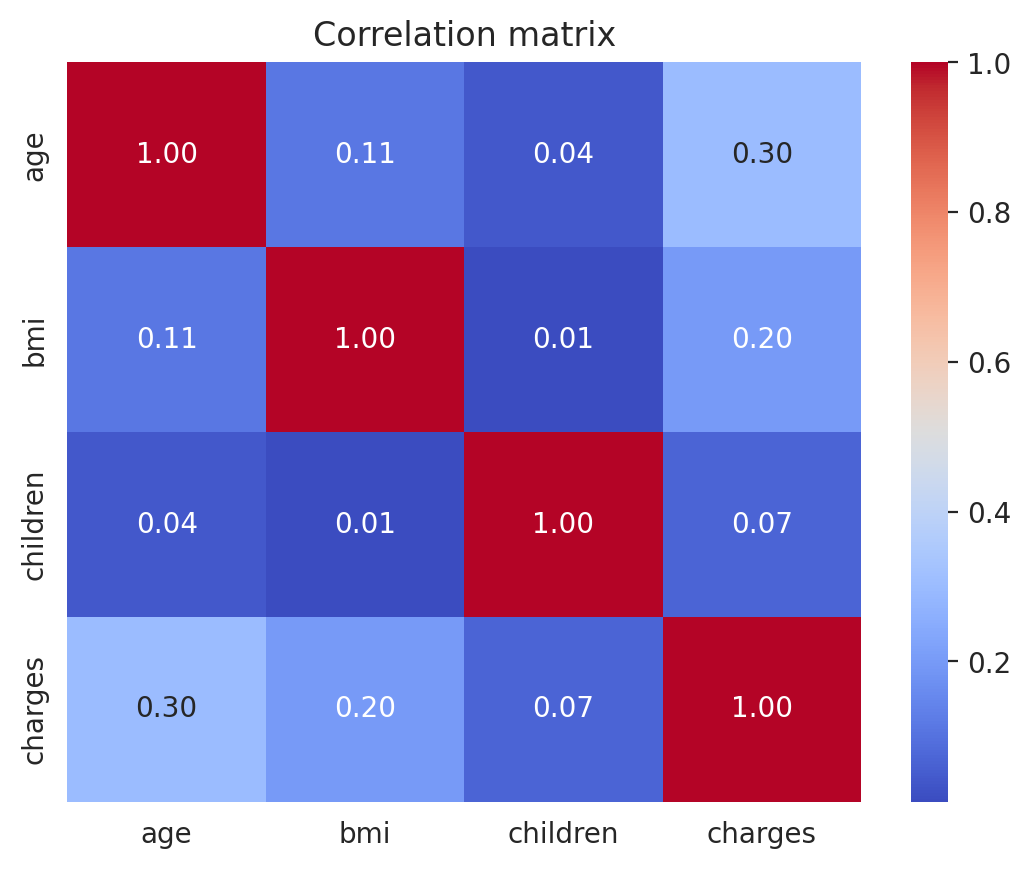

In [8]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

## Age vs charges (with smoker overlay)

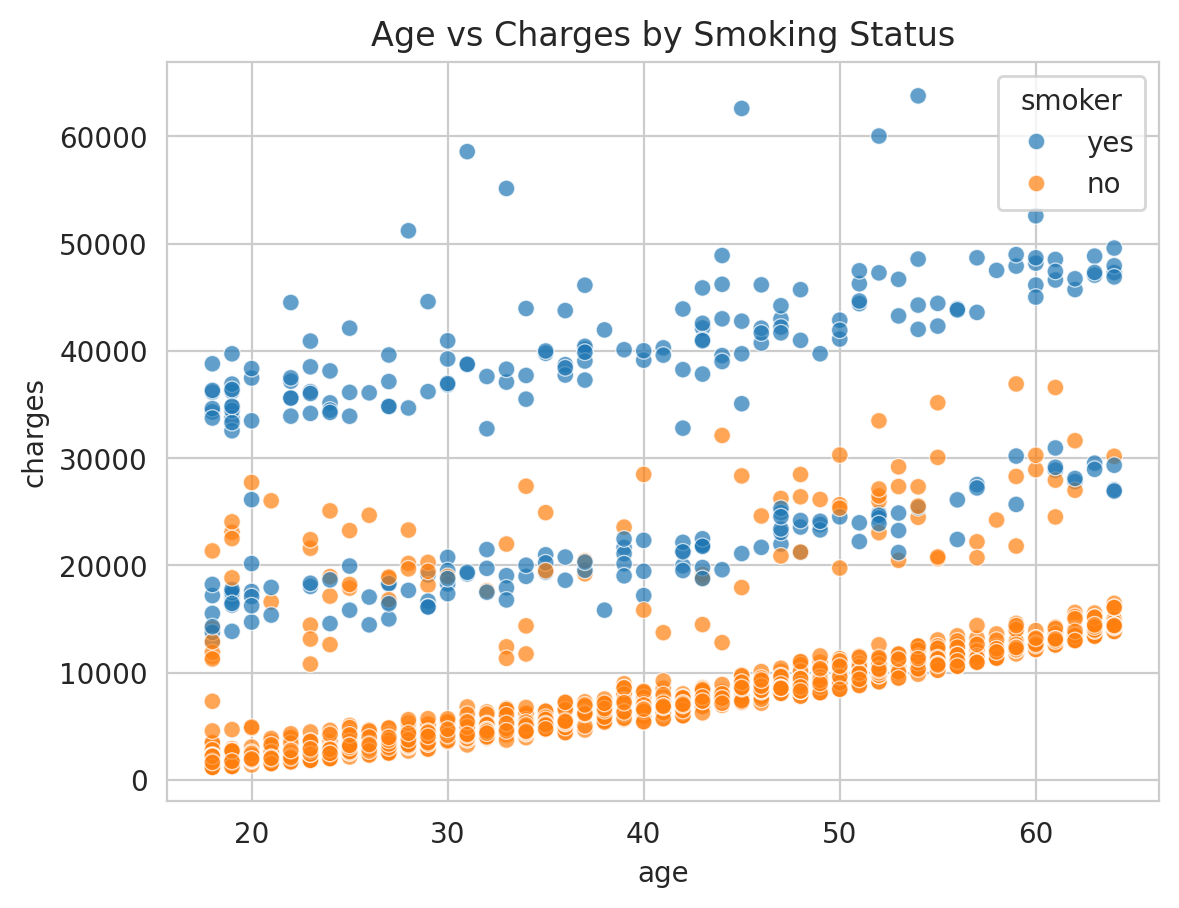

In [9]:
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", alpha=0.7)
plt.title("Age vs Charges by Smoking Status")
plt.show()

## BMI vs charges (with smoker overlay)

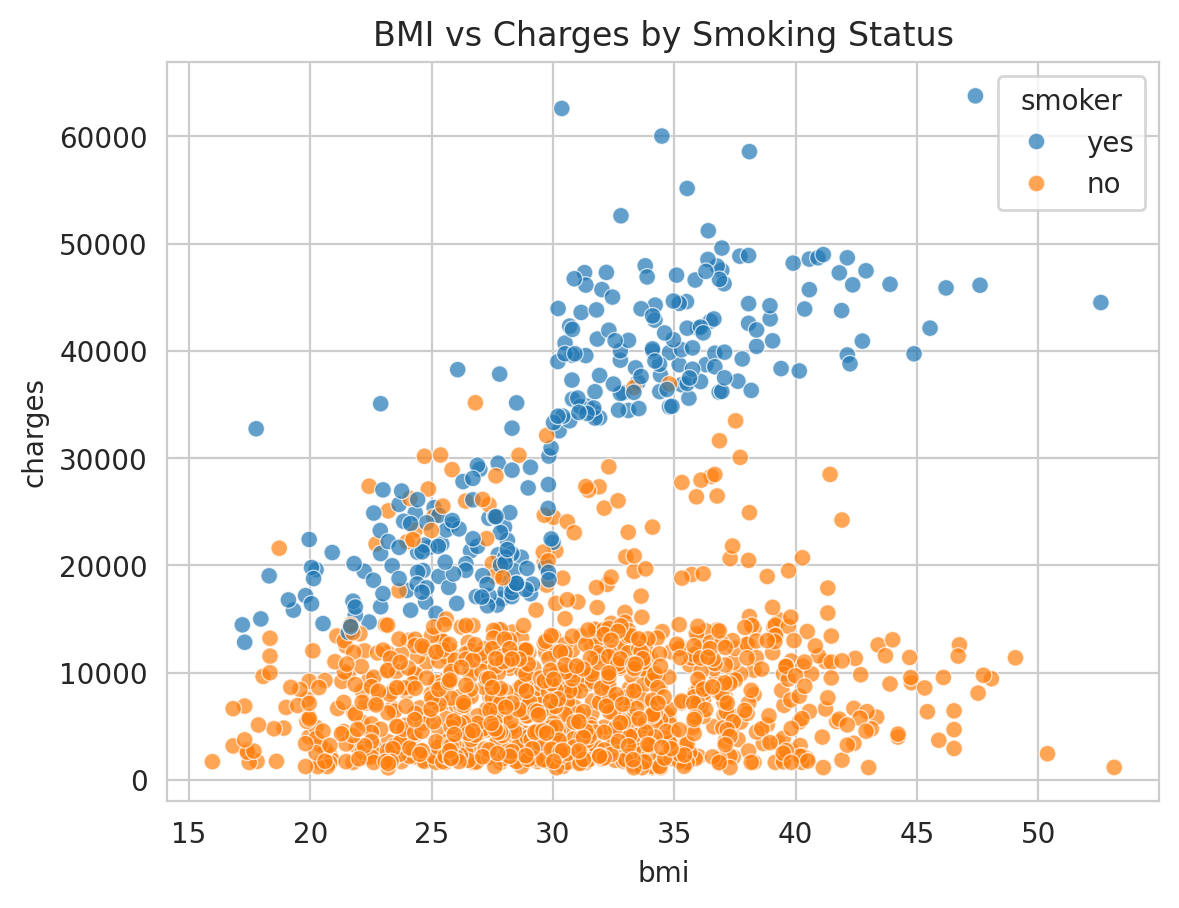

In [10]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", alpha=0.7)
plt.title("BMI vs Charges by Smoking Status")
plt.show()

## Children distribution

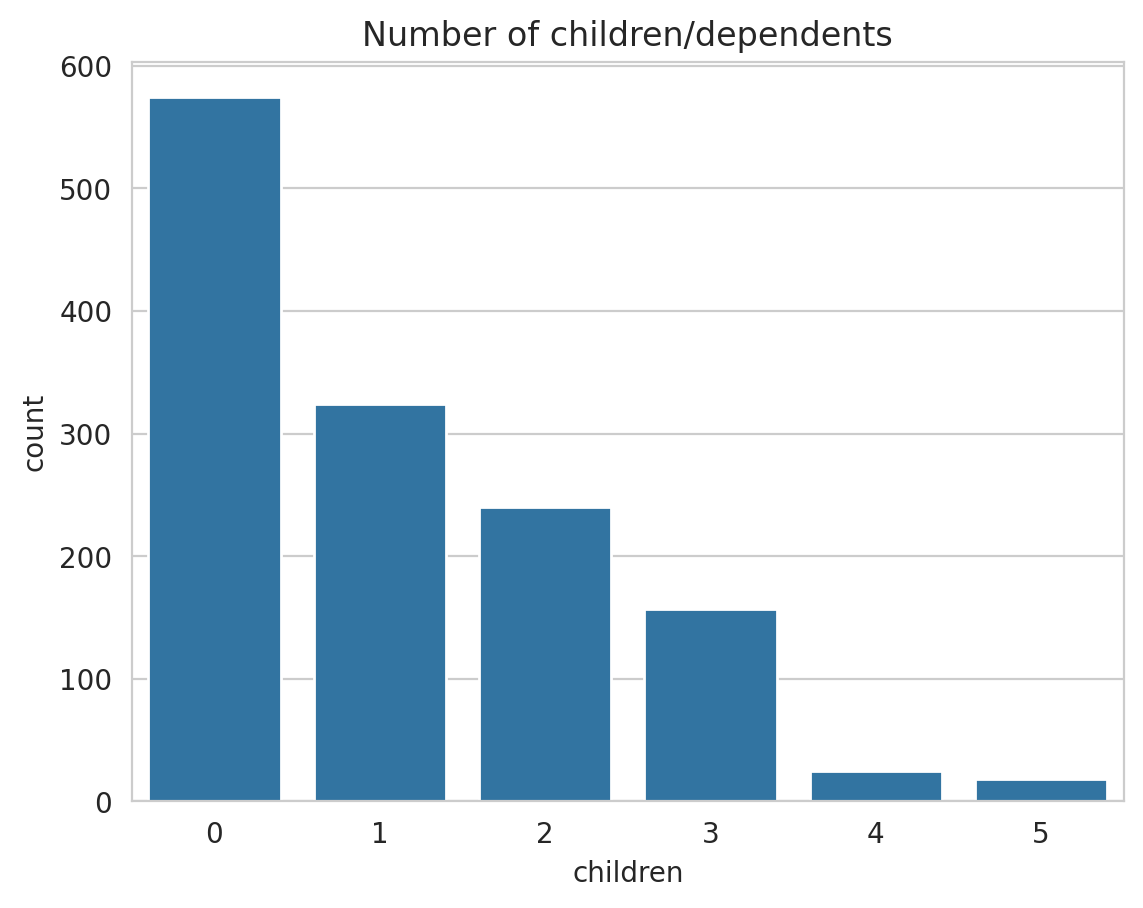

In [11]:
sns.countplot(data=df, x="children")
plt.title("Number of children/dependents")
plt.show()

## Summary
- No missing values  
- Charges are right-skewed (log-transform may help)  
- Smokers incur drastically higher charges  
- Age and BMI show moderate positive correlation with charges  
- Region and sex have weaker effects